In [5]:
import pandas as pd
data = pd.read_csv("employee_attrition_data.csv")

In [6]:
data.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [8]:
data.isna().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.columns

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Job_Title',
       'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours',
       'Promotion_Last_5Years', 'Salary', 'Attrition'],
      dtype='object')

In [11]:
data.drop(columns="Employee_ID", inplace=True)

In [12]:
data.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [14]:
import matplotlib.pyplot as plt

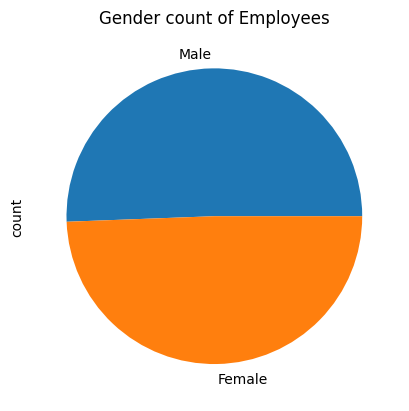

In [17]:
data["Gender"].value_counts().plot(kind="pie")
plt.ylabel=""
plt.title("Gender count of Employees")
plt.show()

In [18]:
data.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


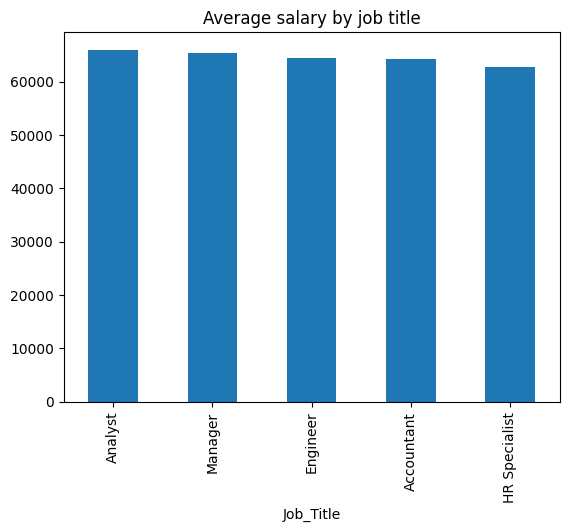

In [61]:
data.groupby("Job_Title")["Salary"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Average salary by job title")
plt.show()

In [46]:
data.groupby(["Department","Promotion_Last_5Years"])["Salary"].mean().reset_index()

,Department,Promotion_Last_5Years,Salary
0,Engineering,0,65541.063636
1,Engineering,1,62424.127660
2,Finance,0,63390.145299
3,Finance,1,62041.269663
4,HR,0,63012.556701
5,HR,1,65882.861702
6,Marketing,0,65251.597826
7,Marketing,1,66018.632653
8,Sales,0,64295.846939
9,Sales,1,67838.756757


In [48]:
data["Salary"].describe()

count     1000.000000
mean     64624.980000
std      20262.984333
min      30099.000000
25%      47613.500000
50%      64525.000000
75%      81921.000000
max      99991.000000
Name: Salary, dtype: float64

In [49]:
x= data[["Years_at_Company","Satisfaction_Level","Average_Monthly_Hours"]]
y=data["Salary"]

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [52]:
x

,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours
0,9,0.586251,151
1,10,0.261161,221
2,8,0.304382,184
3,1,0.480779,242
4,10,0.636244,229
...,...,...,...
995,3,0.377435,239
996,1,0.431152,154
997,3,0.647102,206
998,2,0.304813,241


In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [54]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [55]:
x_test=scaler.fit_transform(x_test)

In [68]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error

def results(prediction):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test,prediction)))
    print("Root mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test,prediction))))

In [69]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [70]:
lr.fit(x_train,y_train)

LinearRegression()

In [71]:
predictionlr=lr.predict(x_test)

In [72]:
results(predictionlr)

Mean absolute error on model is 17767.25193344734
Root mean squared error on model is 20895.587509593897


In [75]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [76]:
lr.fit(x_train,y_train)

LinearRegression()

In [79]:
predictionlr=lr.predict(x_test)

In [80]:
results(predictionlr)

Mean absolute error on model is 17767.25193344734
Root mean squared error on model is 20895.587509593897


In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [82]:
svrmodel=SVR()

In [83]:
param_gridsvr={"C":[0.01,0.1,0.5], "degree":[2,3,4], "kernel":["Linear","rbf","poly"]}

In [84]:
gridsvr=GridSearchCV(svrmodel,param_gridsvr)

In [88]:
gridsvr.fit(x_train,y_train.values.ravel())

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['Linear', 'rbf', 'poly']})

In [89]:
gridsvr.best_params_

{'C': 0.5, 'degree': 3, 'kernel': 'poly'}

In [90]:
predictionsvr=gridsvr.predict(x_test)

In [91]:
results(predictionsvr)

Mean absolute error on model is 17794.602763909472
Root mean squared error on model is 20817.302831504137


In [100]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel=RandomForestRegressor()

In [101]:
param_gridrfr={"n_estimators":[2,3,4,5,6],"max_depth":[5,10,15]}

In [102]:
gridrfr=GridSearchCV(rfrmodel, param_gridrfr)

In [103]:
gridrfr.fit(x_train,y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [104]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 6}

In [111]:
predictionofrfr=gridrfr.predict(x_test)

In [112]:
results(predictionofrfr)

Mean absolute error on model is 18133.082162201383
Root mean squared error on model is 21232.983815889358


In [113]:
lr

LinearRegression()

In [114]:
joblib.dump(lr,"model.pkl")

['model.pkl']

In [115]:
x.columns

Index(['Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours'], dtype='object')